In [3]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
import utils; reload(utils)
from utils import *

from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

WARNING (theano.configdefaults): Only clang++ is supported. With g++, we end up with strange g++/OSX bugs.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
Using TensorFlow backend.


In [4]:
def linearModel(input_shape,learning_rate):
    lm = Sequential([ Dense(1, input_shape=input_shape) ])
    lm.compile(optimizer=SGD(lr=learning_rate), loss='mse')
    return lm
def linear(a,b,x): return a*x + b


## Linear


In [277]:

a = 3
b = 10
n = 30
x = random(n)
# x = [i for i in range(10)]

y = linear(a,b,x)

In [278]:
x

array([ 0.7491,  0.8588,  0.896 ,  0.6875,  0.1728,  0.1211,  0.5048,  0.8653,  0.2611,  0.7497,
        0.4894,  0.2403,  0.1382,  0.3822,  0.5365,  0.4956,  0.3085,  0.5459,  0.8442,  0.8668,
        0.6602,  0.9585,  0.7206,  0.9947,  0.9046,  0.35  ,  0.1031,  0.2096,  0.2506,  0.702 ])

In [279]:
x.shape

(30,)

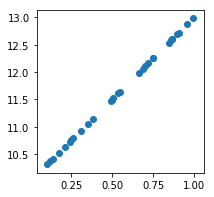

In [280]:
plt.scatter(x,y)

## SGD

In [282]:
# 定义损失函数
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, linear(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [283]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

11.2653

In [284]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [285]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

In [286]:
a

3

In [287]:
b

10

## SGD using kerras


In [288]:
# 1 input
# x = random(30)
# a = 1
# b = -1
# y = x*a + b

# 2 inputs 
x = random((30,2))
a= [2,3]
b= 29
y = np.dot(x,a)+b

In [289]:
model = linModel((2,),0.1)
lm.evaluate(x , y)

30/30 [==============================] - 0s


0.0000

In [290]:

lm.fit(x, y, nb_epoch=5, batch_size=1)

Epoch 1/5
30/30 [==============================] - 0s - loss: 2.0579e-08     
Epoch 2/5
30/30 [==============================] - 0s - loss: 7.5797e-09     
Epoch 3/5
30/30 [==============================] - 0s - loss: 3.6163e-09     
Epoch 4/5
30/30 [==============================] - 0s - loss: 1.4684e-09     
Epoch 5/5
30/30 [==============================] - 0s - loss: 7.3184e-10     


In [291]:
lm.evaluate(x,y,verbose=1)

30/30 [==============================] - 0s


0.0000

In [292]:
lm.get_weights()

[array([[ 2.],
        [ 3.]], dtype=float32), array([ 29.], dtype=float32)]

## Unify Pimsleur and Leitner in HalfLife

### Pimsleur

In [171]:
global w,b
def h(times): return 2**(lin(w,b,times))
def p(delta,halflife): return 2 **(-delta/halflife)

In [175]:
ary = [i+1 for i in range(10)]
x = np.array(ary)

n = len(x)
# w = random(n)*0.3
w_guess = 1
w = 1
b = 1.

x.shape,x,w

((10,), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 1)

In [176]:
h_train = [5.,25.,120.,600.,3600.,3600*5., 3600*24., 3600*24*5., 3600.*24*30*4, 3600.*24*30*24]
y_train = [math.log(h_train[i],2.) for i in range(len(h_train))]
#h = 2 ** y
y_train

[2.3219,
 4.6439,
 6.9069,
 9.2288,
 11.8138,
 14.1357,
 16.3987,
 18.7207,
 23.3056,
 25.8906]

In [177]:
y=linear(w_guess,b,x)
y

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.])

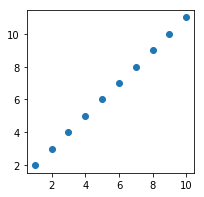

In [178]:
plt.scatter(x,y)

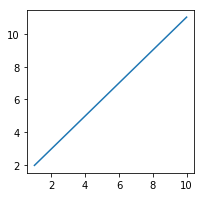

In [179]:
plt.plot(x,y)

In [180]:
# lost function
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y_pred,a,b,x): return sse(y_train,y_pred)
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)
avg_loss(y, w, b, x)

8.2320

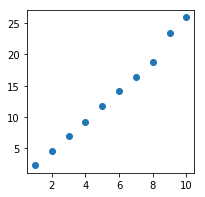

In [181]:
plt.scatter(x,y_train)

In [192]:
lr=0.025
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db
w = w_guess
def upd():
    global w, b
    y_pred = lin(w, b, x)
    dydb = 2 * (y_pred - y_train)
    dydw = x*dydb
    w -= lr*dydw.mean()
    b -= lr*dydb.mean()
    
    
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y_train)
line, = plt.plot(x,y)
plt.close()

def animate(i):
    line.set_ydata(lin(w,b,x))
    for i in range(10): upd()
    return line,
ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

In [185]:
w_guess

1

In [186]:
b

-0.8248

In [187]:
w

2.5758

In [188]:
avg_loss(y, w, b, x)

8.2320

In [190]:
x9 = x[:9]
w9 = w[:9]
h=(2**linear(w9,b,x9))/3600/24
plt.plot(x9,h)
h

IndexError: invalid index to scalar variable.

### Pimsleur with keras

In [145]:
# ary = [i+1 for i in range(10)]
# x = np.array(ary)
x = np.arange(10)+1

h_train = [5.,25.,120.,600.,3600.,3600*5., 3600*24., 3600*24*5., 3600.*24*30*4, 3600.*24*30*24]
y = [math.log(h_train[i],2.) for i in range(len(h_train))]
#h = 2 ** y
x, y

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [2.3219,
  4.6439,
  6.9069,
  9.2288,
  11.8138,
  14.1357,
  16.3987,
  18.7207,
  23.3056,
  25.8906])

In [252]:
model = linModel((1,),0.01)
model.evaluate(x , y)

10/10 [==============================] - 0s


56.6573

In [270]:
model.fit(x,y, nb_epoch=100)

Epoch 1/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 2/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 3/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 4/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 5/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 6/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 7/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 8/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 9/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 10/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 11/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 12/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 13/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 14/1000
10/10 [==============================] - 0s - 

10/10 [==============================] - 0s - loss: 0.4382
Epoch 114/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 115/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 116/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 117/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 118/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 119/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 120/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 121/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 122/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 123/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 124/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 125/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 126/1000
10/10 [==============================]

10/10 [==============================] - 0s - loss: 0.4382
Epoch 334/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 335/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 336/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 337/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 338/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 339/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 340/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 341/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 342/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 343/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 344/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 345/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 346/1000
10/10 [==============================]

10/10 [==============================] - 0s - loss: 0.4382
Epoch 554/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 555/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 556/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 557/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 558/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 559/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 560/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 561/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 562/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 563/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 564/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 565/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 566/1000
10/10 [==============================]

10/10 [==============================] - 0s - loss: 0.4382
Epoch 774/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 775/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 776/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 777/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 778/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 779/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 780/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 781/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 782/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 783/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 784/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 785/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 786/1000
10/10 [==============================]

10/10 [==============================] - 0s - loss: 0.4382
Epoch 994/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 995/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 996/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 997/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 998/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 999/1000
10/10 [==============================] - 0s - loss: 0.4382
Epoch 1000/1000
10/10 [==============================] - 0s - loss: 0.4382


In [271]:
model.evaluate(x,y)

10/10 [==============================] - 0s


0.4382

In [273]:
model.get_weights()

[array([[ 2.5797]], dtype=float32), array([-0.8517], dtype=float32)]

In [274]:
??model


### Leitner


## Halflife


In [388]:
path = "data/"
datas = pd.read_csv(path+'settles.acl16.learning_traces.13m.csv')
datas.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [122]:
len(datas)

NameError: name 'datas' is not defined

In [435]:
users=datas.user_id.unique()
lexemes=datas.lexeme_id.unique()
recalls=datas.p_recall.unique()

users[:5],lexemes[:5], recalls[:5]

(array(['u:FO', 'u:dDwF', 'u:g3WM', 'u:dwbJ', 'u:fxGh'], dtype=object),
 array(['76390c1350a8dac31186187e2fe1e178', '7dfd7086f3671685e2cf1c1da72796d7',
        '35a54c25a2cda8127343f6a82e6f6b7d', '0cf63ffe3dda158bc3dbd55682b355ae',
        '84920990d78044db53c1b012f5bf9ab5'], dtype=object),
 array([ 1.    ,  0.5   ,  0.75  ,  0.8889,  0.8   ]))

In [121]:
"users count : ",len(users)," lexemes count : ",len(lexemes)," recalls count : ",len(recalls)

NameError: name 'users' is not defined

In [436]:
user2idx = {o:i for i,o in enumerate(users)}
tag2idx = {o:i for i,o in enumerate(lexemes)}



将 ID 换成连续的整数, 方便使用 embedding

In [437]:
datas.user_id = datas.user_id.apply(lambda x: user2idx[x])
datas.lexeme_id = datas.lexeme_id.apply(lambda x: tag2idx[x])


In [438]:
datas.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,0,de,en,0,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,0,de,en,1,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,0,de,en,2,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,0,de,en,3,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,0,de,en,4,das/das<det><def><nt><sg><nom>,4,4,1,1


In [440]:
g=datas.groupby('user_id')['user_id'].count()

In [441]:
topUsers=g.sort_values(ascending=False)[:15]
topUsers

user_id
4986     19194
15126     8418
10137     7343
857       7271
8059      7028
14632     6680
2370      6595
4488      6440
5049      6425
10905     6382
121       6361
13465     6181
10495     5976
9273      5923
1070      5842
Name: user_id, dtype: int64

In [442]:
midUsers = g.sort_values(ascending=False)[1300:1305]
midUsers

user_id
55184    1007
34104    1007
95158    1006
16609    1006
28671    1006
Name: user_id, dtype: int64

In [443]:
topRecalls = datas.groupby('p_recall')['p_recall'].count().sort_values(ascending=False)
len(topRecalls), topRecalls

(77, p_recall
 1.000000    10782942
 0.000000      906340
 0.500000      449133
 0.666667      288656
 0.750000      169363
 0.800000       94498
 0.833333       45008
 0.333333       27389
 0.857143       21399
 0.600000       19797
 0.875000       11152
 0.714286        7309
 0.888889        6342
 0.900000        4094
 0.777778        2687
 0.909091        2208
 0.400000        1990
 0.250000        1725
 0.571429        1341
 0.916667        1283
 0.818182        1238
 0.625000         955
 0.923077         952
 0.937500         876
 0.928571         836
 0.846154         606
 0.700000         601
 0.933333         483
 0.727273         430
 0.812500         390
               ...   
 0.789474          28
 0.850000          28
 0.166667          20
 0.764706          18
 0.285714           9
 0.444444           7
 0.583333           6
 0.375000           5
 0.615385           4
 0.142857           3
 0.300000           3
 0.454545           3
 0.363636           2
 0.687500         

## LTV



In [97]:
path = "data/"
datas = pd.read_csv(path+'LTV.csv')
datas.head()

,Segment,Start Date,New Users,Paying,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,...,Day 27,Day 28,Day 29,Day 30,Day 31,Day 32,Day 33,Day 34,Day 35,To Date
0,Chosen Members,Sep 19,2412,63,0.051824,0.114013,0.304312,0.438226,0.520315,0.661692,...,1.759950,1.854063,1.854063,1.854063,1.854063,1.910448,1.922471,1.922471,1.922471,1.922471
1,Non-Chosen Members,Sep 19,5082,158,0.260134,0.458087,0.778434,0.846320,0.978355,1.191854,...,2.585793,2.649941,2.649941,2.665486,2.681031,2.712121,2.743211,2.743211,2.743211,2.743211


In [90]:
datas.groupby('Segment').sum()

,New Users,Paying,Day 0,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,...,Day 27,Day 28,Day 29,Day 30,Day 31,Day 32,Day 33,Day 34,Day 35,To Date
Segment,,,,,,,,,,,,,,,,,,,,,
Chosen Members,2412,63,0.051824,0.114013,0.304312,0.438226,0.520315,0.661692,0.754146,0.949420,...,1.759950,1.854063,1.854063,1.854063,1.854063,1.910448,1.922471,1.922471,1.922471,1.922471
Non-Chosen Members,5082,158,0.260134,0.458087,0.778434,0.846320,0.978355,1.191854,1.267611,1.345336,...,2.585793,2.649941,2.649941,2.665486,2.681031,2.712121,2.743211,2.743211,2.743211,2.743211


In [91]:
datas.values

array([['Chosen Members', 'Sep 19', 2412, 63, 0.05182421227197346, 0.11401326699834162,
        0.3043117744610282, 0.4382255389718076, 0.5203150912106136, 0.6616915422885572,
        0.7541459369817579, 0.9494195688225538, 1.1417910447761197, 1.2624378109452736,
        1.2624378109452736, 1.2624378109452736, 1.3113598673300166, 1.4038142620232172,
        1.4038142620232172, 1.4859038142620231, 1.4859038142620231, 1.5140961857379769,
        1.5140961857379769, 1.5244610281923714, 1.6065505804311777, 1.6169154228855722,
        1.6376451077943617, 1.6376451077943617, 1.6376451077943617, 1.6658374792703148,
        1.7599502487562189, 1.7599502487562189, 1.8540630182421227, 1.8540630182421227,
        1.8540630182421227, 1.8540630182421227, 1.9104477611940296, 1.922470978441128,
        1.922470978441128, 1.922470978441128, 1.922470978441128],
       ['Non-Chosen Members', 'Sep 19', 5082, 158, 0.26013380558835103, 0.4580873671782762,
        0.7784336875245966, 0.8463203463203464, 0.9

In [98]:
ltv= datas[datas.columns[4:]].values
ltv

array([[ 0.0518,  0.114 ,  0.3043,  0.4382,  0.5203,  0.6617,  0.7541,  0.9494,  1.1418,  1.2624,
         1.2624,  1.2624,  1.3114,  1.4038,  1.4038,  1.4859,  1.4859,  1.5141,  1.5141,  1.5245,
         1.6066,  1.6169,  1.6376,  1.6376,  1.6376,  1.6658,  1.76  ,  1.76  ,  1.8541,  1.8541,
         1.8541,  1.8541,  1.9104,  1.9225,  1.9225,  1.9225,  1.9225],
       [ 0.2601,  0.4581,  0.7784,  0.8463,  0.9784,  1.1919,  1.2676,  1.3453,  1.4697,  1.563 ,
         1.5941,  1.6251,  1.6718,  1.7184,  1.8117,  1.8894,  1.9205,  1.9974,  2.0285,  2.121 ,
         2.1521,  2.1832,  2.292 ,  2.4467,  2.4933,  2.5244,  2.5399,  2.5858,  2.6499,  2.6499,
         2.6655,  2.681 ,  2.7121,  2.7432,  2.7432,  2.7432,  2.7432]])

In [93]:
n= len(ltv[0])
x=np.arange(n)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])

'Member: LTV'

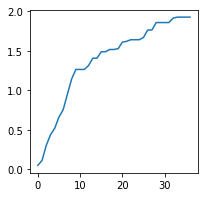

In [121]:
plt.plot(x,ltv[0])
"Member: LTV"

'Non-Member: LTV'

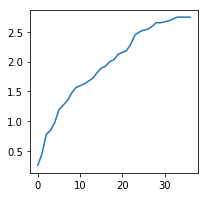

In [95]:
plt.plot(x,ltv[1])
"Non-Member: LTV"

In [132]:
np.zeros((2,n))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.]])

In [139]:
y=np.zeros((2,n))
for j in range(len(y)):
    for i in range(n):
        print("x: {} y: {}".format(j,i))
        print("before : {}".format(ltv[j][i]))

        if i != 0 :
#             y[j][i] = (ltv[j][i] - ltv[j][i-1])/ltv[j][i-1]
            y[j][i] = ltv[j][i] - ltv[j][i-1]
        print("after : {}".format(y[j][i]))

x: 0 y: 0
before : 0.051824212272
after : 0.0
x: 0 y: 1
before : 0.114013266998
after : 0.0621890547264
x: 0 y: 2
before : 0.304311774461
after : 0.190298507463
x: 0 y: 3
before : 0.438225538972
after : 0.133913764511
x: 0 y: 4
before : 0.520315091211
after : 0.0820895522388
x: 0 y: 5
before : 0.661691542289
after : 0.141376451078
x: 0 y: 6
before : 0.754145936982
after : 0.0924543946932
x: 0 y: 7
before : 0.949419568823
after : 0.195273631841
x: 0 y: 8
before : 1.14179104478
after : 0.192371475954
x: 0 y: 9
before : 1.26243781095
after : 0.120646766169
x: 0 y: 10
before : 1.26243781095
after : 0.0
x: 0 y: 11
before : 1.26243781095
after : 0.0
x: 0 y: 12
before : 1.31135986733
after : 0.0489220563847
x: 0 y: 13
before : 1.40381426202
after : 0.0924543946932
x: 0 y: 14
before : 1.40381426202
after : 0.0
x: 0 y: 15
before : 1.48590381426
after : 0.0820895522388
x: 0 y: 16
before : 1.48590381426
after : 0.0
x: 0 y: 17
before : 1.51409618574
after : 0.028192371476
x: 0 y: 18
before : 1.514

In [140]:
ltv

array([[ 0.0518,  0.114 ,  0.3043,  0.4382,  0.5203,  0.6617,  0.7541,  0.9494,  1.1418,  1.2624,
         1.2624,  1.2624,  1.3114,  1.4038,  1.4038,  1.4859,  1.4859,  1.5141,  1.5141,  1.5245,
         1.6066,  1.6169,  1.6376,  1.6376,  1.6376,  1.6658,  1.76  ,  1.76  ,  1.8541,  1.8541,
         1.8541,  1.8541,  1.9104,  1.9225,  1.9225,  1.9225,  1.9225],
       [ 0.2601,  0.4581,  0.7784,  0.8463,  0.9784,  1.1919,  1.2676,  1.3453,  1.4697,  1.563 ,
         1.5941,  1.6251,  1.6718,  1.7184,  1.8117,  1.8894,  1.9205,  1.9974,  2.0285,  2.121 ,
         2.1521,  2.1832,  2.292 ,  2.4467,  2.4933,  2.5244,  2.5399,  2.5858,  2.6499,  2.6499,
         2.6655,  2.681 ,  2.7121,  2.7432,  2.7432,  2.7432,  2.7432]])

In [141]:
y[0]

array([ 0.    ,  0.0622,  0.1903,  0.1339,  0.0821,  0.1414,  0.0925,  0.1953,  0.1924,  0.1206,
        0.    ,  0.    ,  0.0489,  0.0925,  0.    ,  0.0821,  0.    ,  0.0282,  0.    ,  0.0104,
        0.0821,  0.0104,  0.0207,  0.    ,  0.    ,  0.0282,  0.0941,  0.    ,  0.0941,  0.    ,
        0.    ,  0.    ,  0.0564,  0.012 ,  0.    ,  0.    ,  0.    ])

In [142]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])

'Member: Delta LTV'

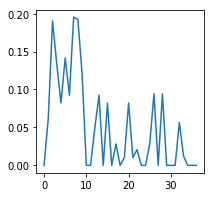

In [143]:
plt.plot(x,y[0])
"Member: Delta LTV"

'Non-Member: Delta LTV'

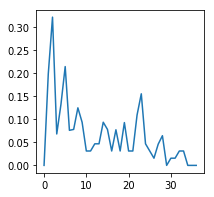

In [144]:
plt.plot(x,y[1])
"Non-Member: Delta LTV"

In [196]:
x=np.arange(1000)

In [197]:
y = np.log(x)
y

array([   -inf,  0.    ,  0.6931,  1.0986,  1.3863,  1.6094,  1.7918,  1.9459,  2.0794,  2.1972,
        2.3026,  2.3979,  2.4849,  2.5649,  2.6391,  2.7081,  2.7726,  2.8332,  2.8904,  2.9444,
        2.9957,  3.0445,  3.091 ,  3.1355,  3.1781,  3.2189,  3.2581,  3.2958,  3.3322,  3.3673,
        3.4012,  3.434 ,  3.4657,  3.4965,  3.5264,  3.5553,  3.5835,  3.6109,  3.6376,  3.6636,
        3.6889,  3.7136,  3.7377,  3.7612,  3.7842,  3.8067,  3.8286,  3.8501,  3.8712,  3.8918,
        3.912 ,  3.9318,  3.9512,  3.9703,  3.989 ,  4.0073,  4.0254,  4.0431,  4.0604,  4.0775,
        4.0943,  4.1109,  4.1271,  4.1431,  4.1589,  4.1744,  4.1897,  4.2047,  4.2195,  4.2341,
        4.2485,  4.2627,  4.2767,  4.2905,  4.3041,  4.3175,  4.3307,  4.3438,  4.3567,  4.3694,
        4.382 ,  4.3944,  4.4067,  4.4188,  4.4308,  4.4427,  4.4543,  4.4659,  4.4773,  4.4886,
        4.4998,  4.5109,  4.5218,  4.5326,  4.5433,  4.5539,  4.5643,  4.5747,  4.585 ,  4.5951,
        4.6052,  4.6151,  4.62

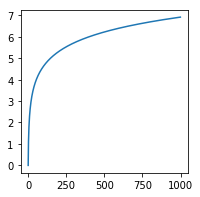

In [198]:
plt.plot(x,y)

# Knowledge


1. 合并所有知识点为一个 data set
2. 清理 lessonprogress ，将 L1MC01.L1MC012.score 打平
3. lessonprogress join knowledge 以及 baby age
4. 按 lesson section id 分组
5. 

## setup


In [260]:
import pandas as pd
from pymongo import MongoClient


def _connect_mongo(host, port, username, password, db):
    """ A util for making a connection to mongo """

    if username and password:
        mongo_uri = 'mongodb://%s:%s@%s:%s/%s' % (username, password, host, port, db)
        print(mongo_uri)
        conn = MongoClient(mongo_uri)
    else:
        conn = MongoClient(host, port)


    return conn[db]

def dev_db():
    global db
    if db:
        return db
    else: 
        db = _connect_mongo(host="dev.jiliguala.com", port=27646, username="JLBackEnd", password="a74528a4-d8f0-478f-8431-3ad318afd4b2", db="JLGL")
        return db

def toDF(cursor): 
    return pd.DataFrame(list(cursor))

def db_query(collection, query={}, no_id=False):
    """ Read from Mongo and Store into DataFrame """

    # Connect to MongoDB
    db = dev_db()

    # Make a query to the specific DB and Collection
    cursor = db[collection].find(query)

    # Expand the cursor and construct the DataFrame
    df =  pd.DataFrame(list(cursor))

    # Delete the _id
    if no_id:
        del df['_id']

    return df

In [441]:
"""
db = dev_db()
cursor = db["lessonprogress"].aggregate([
    {"$match": {"_id":"026c821b48084959b265aa734c3f024c"}},
#     {"$project" : {"_id":1,"MC.L2MC.status": 1}},
    {"$project" : {"_id":1,"MC.L2MC.status": 1, "type": { "$concat" : ["L2MC",""]}}},# how to get $index?
  #  {"$unwind" : { "path" : "$MC.L2MC.status",  "includeArrayIndex": "arrayIndex"}}, #需要 3.2 版本才支持
    {"$unwind" : "$MC.L2MC.status"},
#         {"$unwind" : "$MC.L2MC.status"},
#     { "$group" : {"_id":"$_id","sec": { "$push" : "$$CURRENT._id"}}}
#     { "$group" : {"_id":"$_id","MC": "$$CURRENT._id"}}
])
result = toDF(cursor)
result.head()
"""

db = dev_db()

## Knowledge

In [442]:
df = db_query("L2MCK")

In [443]:
df.head()

,_id,cat,text,typ
0,L2MC0121,listen,clap,010
1,L2MC0122,listen,stretch,010
2,L2MC0123,listen,stomp,010
3,L2MC0124,listen,stretch,010
4,L2MC0125,listen,stomp,010


## Lesson Progress

In [436]:
df = db_query("baby_lesson_progress")
df.head()

,_id,value
0,09345560fb5041dc88d63ae33e94badd,"{u'bid': u'09345560fb5041dc88d63ae33e94badd', ..."
1,0acf10e381d14ca9bf204d8eadc60678,"{u'L2MC3_3': 90.0, u'L2MC3_2': 100.0, u'bid': ..."
2,0b03cfc85aa84df39132bb0f281aa886,"{u'L2MC9_3': 54.0, u'L2MC9_2': 47.0, u'bid': u..."
3,0f876ec86f304237bc9b60cbf2f8daac,"{u'bid': u'0f876ec86f304237bc9b60cbf2f8daac', ..."
4,10d394214e964ec89ca874098f94ac3a,"{u'L2MC3_3': 11.0, u'bid': u'10d394214e964ec89..."


In [437]:
ary = df.value
ary

0     {u'bid': u'09345560fb5041dc88d63ae33e94badd', ...
1     {u'L2MC3_3': 90.0, u'L2MC3_2': 100.0, u'bid': ...
2     {u'L2MC9_3': 54.0, u'L2MC9_2': 47.0, u'bid': u...
3     {u'bid': u'0f876ec86f304237bc9b60cbf2f8daac', ...
4     {u'L2MC3_3': 11.0, u'bid': u'10d394214e964ec89...
5     {u'bid': u'128032a187ec43a6b8011cdf776b64b4', ...
6     {u'L2MC2_2': 46.0, u'L2MC2_3': 56.0, u'bid': u...
7     {u'bid': u'1a3f8fc50d3546be916f0361ae25f5ec', ...
8     {u'L2MC2_2': 67.0, u'L2MC2_3': 1.0, u'bid': u'...
9     {u'bid': u'1e0051709a8b498fb34cf63d653fba82', ...
10    {u'L2MC3_3': 7.0, u'L2MC3_2': 92.0, u'bid': u'...
11    {u'bid': u'28def1c2b9a24d36a2fc828f1c084abe', ...
12    {u'bid': u'4357460313774786a036b532e5c84bf9', ...
13    {u'bid': u'5a0cb2973cbe44e5a898b4af455dc133', ...
14    {u'bid': u'6cbc4fbd4ce94b71b9d656986ec91912', ...
15    {u'bid': u'84dc338feed440fd80c5c690552b1ca0', ...
16    {u'L2MC15_2': 92.0, u'L2MC24_3': 44.0, u'L2MC1...
17    {u'bid': u'8ca6226fb5c2478e924b2b65e5602ce

In [438]:
datas = ary.apply(pd.Series)
datas.head()

,L2MC10_2,L2MC11_2,L2MC12_2,L2MC13_2,L2MC15_2,L2MC17_2,L2MC19_2,L2MC1_2,L2MC1_3,L2MC20_2,...,L2MC5_3,L2MC6_2,L2MC6_3,L2MC7_2,L2MC7_3,L2MC8_2,L2MC8_3,L2MC9_2,L2MC9_3,bid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,97.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09345560fb5041dc88d63ae33e94badd
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0acf10e381d14ca9bf204d8eadc60678
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.0,84.0,97.0,92.0,39.0,73.0,5.0,47.0,54.0,0b03cfc85aa84df39132bb0f281aa886
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0f876ec86f304237bc9b60cbf2f8daac
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10d394214e964ec89ca874098f94ac3a


In [439]:
datas.describe()

,L2MC10_2,L2MC11_2,L2MC12_2,L2MC13_2,L2MC15_2,L2MC17_2,L2MC19_2,L2MC1_2,L2MC1_3,L2MC20_2,...,L2MC5_2,L2MC5_3,L2MC6_2,L2MC6_3,L2MC7_2,L2MC7_3,L2MC8_2,L2MC8_3,L2MC9_2,L2MC9_3
count,1.0,2.000000,2.000000,2.00000,1.0,1.0,1.0,20.000000,17.000000,1.0,...,2.000000,2.000000,3.000000,2.000000,1.0,2.000000,2.00000,1.0,2.00000,2.00000
mean,3.0,78.000000,96.000000,84.00000,92.0,34.0,50.0,80.800000,59.529412,75.0,...,89.500000,73.500000,87.333333,81.000000,92.0,60.500000,71.50000,5.0,61.00000,68.00000
std,NaN,31.112698,5.656854,19.79899,NaN,NaN,NaN,17.846126,37.443487,NaN,...,3.535534,23.334524,4.163332,22.627417,NaN,30.405592,2.12132,NaN,19.79899,19.79899
min,3.0,56.000000,92.000000,70.00000,92.0,34.0,50.0,47.000000,2.000000,75.0,...,87.000000,57.000000,84.000000,65.000000,92.0,39.000000,70.00000,5.0,47.00000,54.00000
25%,3.0,67.000000,94.000000,77.00000,92.0,34.0,50.0,73.000000,20.000000,75.0,...,88.250000,65.250000,85.000000,73.000000,92.0,49.750000,70.75000,5.0,54.00000,61.00000
50%,3.0,78.000000,96.000000,84.00000,92.0,34.0,50.0,82.500000,74.000000,75.0,...,89.500000,73.500000,86.000000,81.000000,92.0,60.500000,71.50000,5.0,61.00000,68.00000
75%,3.0,89.000000,98.000000,91.00000,92.0,34.0,50.0,100.000000,94.000000,75.0,...,90.750000,81.750000,89.000000,89.000000,92.0,71.250000,72.25000,5.0,68.00000,75.00000
max,3.0,100.000000,100.000000,98.00000,92.0,34.0,50.0,100.000000,99.000000,75.0,...,92.000000,90.000000,92.000000,97.000000,92.0,82.000000,73.00000,5.0,75.00000,82.00000
